<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana4/Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [38]:
X = np.array([-1,0,1])
Y = np.array([4,5,2])

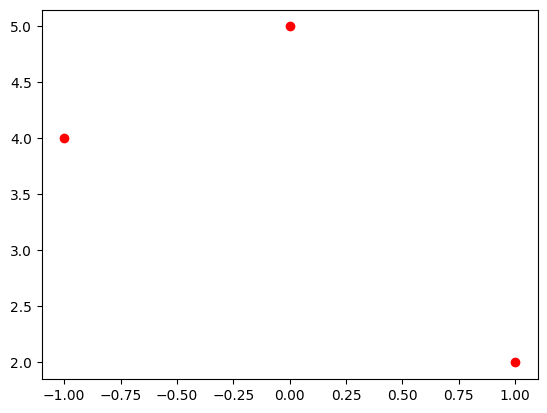

In [39]:
plt.scatter(X,Y,color='r')

In [40]:
x = sym.Symbol('x',real=True)
x

x

In [41]:
def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L


In [42]:
Lagrange(x,X,0)

-x*(1/2 - x/2)

In [43]:
Lagrange(x,X,1)

(1 - x)*(x + 1)

In [44]:
Lagrange(x,X,2)

x*(x/2 + 1/2)

In [45]:
Lagrange(x,X,2).subs(x,3)

6

In [46]:
def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

In [47]:
x1 = np.linspace(X[0],X[-1],50)
y1 = Interpolate(x1,X,Y)

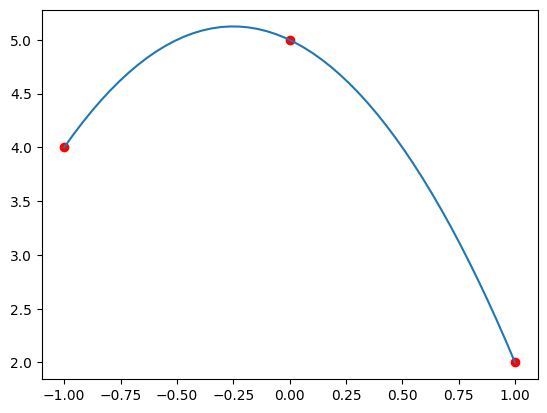

In [48]:
plt.scatter(X,Y,color='r')
plt.plot(x1,y1)

In [49]:
poly = Interpolate(x,X,Y)
poly = poly.expand()
poly

-2*x**2 - x + 5

In [57]:
L0 = Lagrange(x,X,0)
L0

-x*(1/2 - x/2)

In [59]:
DL0 = sym.diff(L0,x,1)
DL0

x - 1/2

In [61]:
DL0.subs(x,0)

-1/2